In [440]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce


In [424]:
data = pd.read_csv("sales1000.csv")
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Order Weekday,Unit Margin,Order_Ship_Days
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,2014-10-18,686800706,2014-10-31,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,2014,10,fri,173.87,13 days
1,North America,Canada,Vegetables,Online,M,2011-11-07,185941302,2011-12-08,3018,154.06,90.93,464953.08,274426.74,190526.34,2011,11,sun,63.13,31 days
2,Middle East and North Africa,Libya,Baby Food,Offline,C,2016-10-31,246222341,2016-12-09,1517,255.28,159.42,387259.76,241840.14,145419.62,2016,10,sun,95.86,39 days
3,Asia,Japan,Cereal,Offline,C,2010-04-10,161442649,2010-05-12,3322,205.70,117.11,683335.40,389039.42,294295.98,2010,4,fri,88.59,32 days
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,2011-08-16,645713555,2011-08-31,9845,9.33,6.92,91853.85,68127.40,23726.45,2011,8,mon,2.41,15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,2010-04-18,534085166,2010-04-25,6524,152.58,97.44,995431.92,635698.56,359733.36,2010,4,sat,55.14,7 days
996,Europe,Georgia,Baby Food,Offline,H,2011-08-01,590768182,2011-09-07,288,255.28,159.42,73520.64,45912.96,27607.68,2011,8,sun,95.86,37 days
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,2011-05-12,524363124,2011-06-28,9556,154.06,90.93,1472197.36,868927.08,603270.28,2011,5,wed,63.13,47 days
998,Europe,Finland,Household,Offline,L,2016-01-25,289606320,2016-02-14,9801,668.27,502.54,6549714.27,4925394.54,1624319.73,2016,1,sun,165.73,20 days


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11656\74618483.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


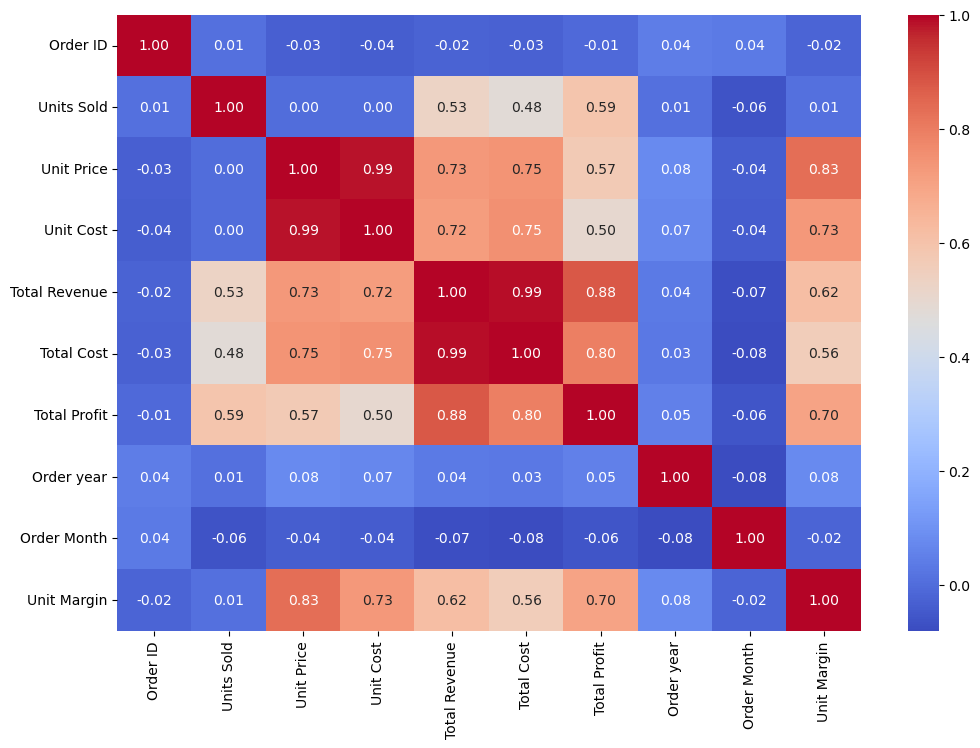

In [425]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [426]:

data = data.drop(['Order Priority','Order ID', 'Order_Ship_Days','Ship Date','Order Date', 'Order year', 'Total Cost','Unit Price' ], axis=1)


In [427]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         1000 non-null   object 
 1   Country        1000 non-null   object 
 2   Item Type      1000 non-null   object 
 3   Sales Channel  1000 non-null   object 
 4   Units Sold     1000 non-null   int64  
 5   Unit Cost      1000 non-null   float64
 6   Total Revenue  1000 non-null   float64
 7   Total Profit   1000 non-null   float64
 8   Order Month    1000 non-null   int64  
 9   Order Weekday  1000 non-null   object 
 10  Unit Margin    1000 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 86.1+ KB


In [428]:
encoder = ce.OrdinalEncoder(cols=['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Weekday'])
data = encoder.fit_transform(data)
data.head(3)

,Region,Country,Item Type,Sales Channel,Units Sold,Unit Cost,Total Revenue,Total Profit,Order Month,Order Weekday,Unit Margin
0,1,1,1,1,8446,263.33,3692591.20,1468506.02,10,1,173.87
1,2,2,2,2,3018,90.93,464953.08,190526.34,11,2,63.13
2,1,1,3,1,1517,159.42,387259.76,145419.62,10,2,95.86


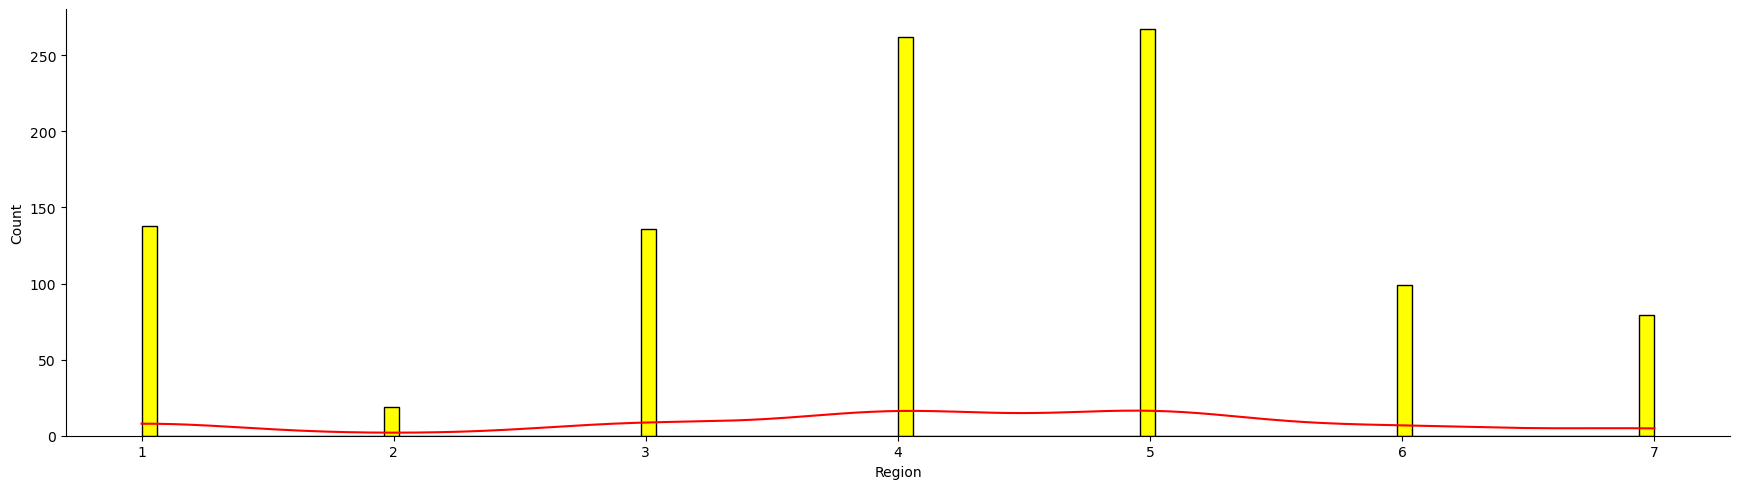

In [429]:
sns.displot(data=data, x="Region", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

In [430]:
X = data.drop("Total Profit", axis=1)
y = data["Total Profit"]
X = np.hstack([np.ones((X.shape[0], 1)), X])  
def normalize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1  
    X_train_normalized = (X_train - mean) / std
    X_test_normalized = (X_test - mean) / std  
    return X_train_normalized, X_test_normalized

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train)
X_train, X_test = normalize(X_train, X_test)


In [431]:
print(X.shape)

(1000, 11)


In [441]:
import numpy as np

def fit(x, y, learning_rate, epochs=900):
    m, n = x.shape
    w = np.zeros(n)  # Initialize weights
    
    loss_history = []
    for epoch in range(epochs):
        y_pred = x.dot(w)
        error = y_pred - y
        loss = np.mean(error ** 2)  # MSE
        loss_history.append(loss)
        gradient = (1/m) * x.T.dot(error)
        w -= learning_rate * gradient

    plt.plot(range(epochs), loss_history)
    plt.xlabel('eoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss Curve')
    plt.show()
    
    return w  # Return final weights

    

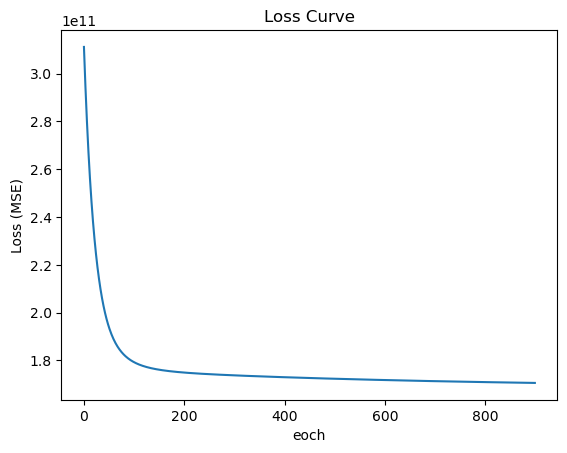

[ 0.00000000e+00 -1.37920113e+03 -7.51470614e+02 -5.36797184e+04
  1.59905094e+03  1.06387636e+05 -6.45300162e+04  2.30070126e+05
 -1.55402226e+02  2.00031608e+03  1.52736165e+05]


In [442]:
model = fit(X_train, y_train, 0.01)
print(model)

In [436]:
y_pred = X_test.dot(model)


In [437]:
print("Predictions", y_pred)

Predictions [-248350.43487061 -385296.53618353  -89541.91578967  210082.86234047
  114818.85391345  184291.34616507 -217613.24606271 -110174.71298394
 -392504.35173629 -234304.47663352 -264974.61101582  -67209.50609672
  -40547.27463183 -198060.06235772  -30318.66756414  -74487.9099925
   29377.62230653  213109.59008881  284861.84992986   34308.740086
 -158744.06818224 -429390.57142507 -316908.75012069  132071.83555865
  984819.8510368  -267253.18570764 -145239.11554262 -201444.78964932
 -168794.61134625  -75171.4667844   810349.89518232 -175028.867883
  147074.85790815 -247863.76330896 -154072.43482343 -519145.05046778
 -232926.67419161 -219092.57713479  -19993.46900497 -490105.9464522
 -236727.81034649 -477211.89181044 -258583.66269479  148877.72258342
  602482.10197103 -459139.16868715  302627.29672575  172474.78276653
 -249719.29675524 -251404.27151726 -387271.06763708 -172277.59998853
  -61147.82711871 -240960.57090624 -317948.73900602 -469059.7430864
 -294536.14758847 -182731.510

In [438]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(mae)


Mean Squared Error: 151890688624.56638
R² Score: -0.3174616522263247
376557.93283669394
